## Pre-process Image
In order to get the best results with a 2D convolution, it is generally recommended that you process the image in grayscale. This is what is done here in the function `load_image_as_grayscale()` 

In [ ]:
!gdown --id 1-hPY4VMCJmb0U5plVtIoaOVgvHiCzrIS

Downloading...
From: https://drive.google.com/uc?id=1-hPY4VMCJmb0U5plVtIoaOVgvHiCzrIS
To: /content/city1.jpeg
100% 315k/315k [00:00<00:00, 2.94MB/s]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def load_image_as_grayscale(path):
    img = Image.open(path) #read the image
#     img = img.resize((32,32)) #resize the image
    img = np.array(img) #convert image to numpy array
    return rgb2gray(img) # convert RGB to grayscale and return

(547, 550)


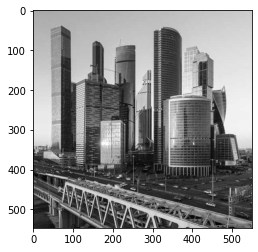

In [ ]:
img = load_image_as_grayscale('/content/city1.jpeg')
print(img.shape)
plt.imshow(img, cmap='gray') # convert the RGB to GRAY

In [ ]:
img/255.

array([[0.65949725, 0.65949725, 0.65949725, ..., 0.79269765, 0.79269765,
        0.79269765],
       [0.65949725, 0.65949725, 0.65949725, ..., 0.79269765, 0.79269765,
        0.79269765],
       [0.65949725, 0.65949725, 0.65949725, ..., 0.79269765, 0.79269765,
        0.79269765],
       ...,
       [0.16003804, 0.15611686, 0.15611686, ..., 0.23042392, 0.33024157,
        0.47504706],
       [0.14827451, 0.14435333, 0.14435333, ..., 0.34021686, 0.36945333,
        0.43975647],
       [0.14043216, 0.13651098, 0.13651098, ..., 0.42648275, 0.4086651 ,
        0.42015059]])

In [ ]:
#kernel for vertical lines
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

In [ ]:
np.flipud(np.fliplr(kernel))

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

# 2D Convolution - Forward Propagation
To start the 2D Convolution method, we will have the following method header:<br>
```def convolve2D(image, kernel, padding=0, strides=1:``` <br>
Such that the image and kernel are specified by the user and the default padding around the image is 0 and default stride is 1.

The next thing that we must do is apply cross correlation to our kernel and this can be done using NumPy very easily through just flipping the matrix horizontally then vertically. This looks like:<br>
`kernel = np.flipud(np.fliplr(kernel))`<br>
We then need to compute the matrix size of our outputted image. This can very simply be done through the formula:

<img src='https://github.com/redwankarimsony/CNN-Explainer-for-Beginners/blob/main/dim.png?raw=1'>

This must be implemented in each dimension (x, y). To start, we must gather the x and y size of the image and kernel. This can be done through:
```
xKernShape = kernel.shape[0] 
yKernShape = kernel.shape[1] 
xImgShape = image.shape[0] 
yImgShape = image.shape[0]
```

In [ ]:
def Custom_Convolve2D(image, kernel, padding=0, strides=1):
    image=image/255.
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
  

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output
    # Your Code Goes Here

##Testing the implementation

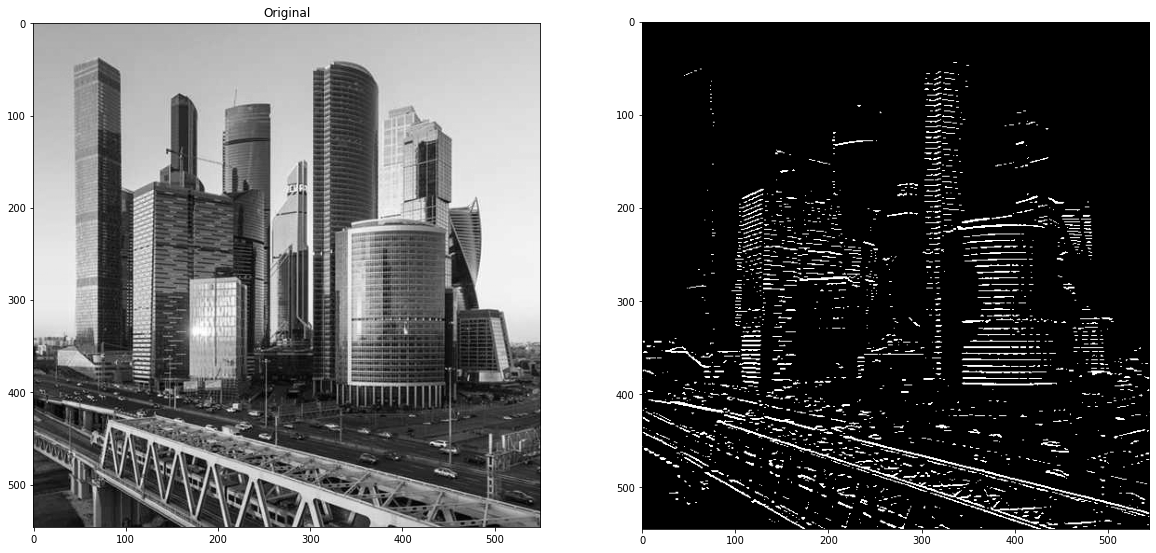

In [ ]:
img = load_image_as_grCopy ofayscale('/content/city1.jpeg')
output = Custom_Convolve2D(image=img, kernel= kernel.T)
result = (output-output.min())/(output.max() - output.min())

f, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title('Original')

axarr[1].imshow((result>0.6)*1., cmap = 'gray')

In [ ]:
print(np.max(img))

254.7465


## What To Do:
Implement the following in the following fashion. Add custom dummy weights in the `Custom_Dense()` layer to a valid 10 class output in the last softrax layers. 
1. `Custom_Convolve2D()`
2. `Custom_MaxPlolling()`
3. `Custom_Flatten()`
4. `Custom_Dense()`
4. `Custom_Softmax()`

Make sure that, the follwong segment of code works. 

In [ ]:
# x = convolve2D(img, kernel)
# x = maxPlooling(x)
# x = Custom_Flatten(x)
# x = Custom_Dense(x, 10)
# output = Custom_softmax(x)

In [ ]:
from numpy.lib.stride_tricks import as_strided
def Custom_MaxPooling(image, kernel, strides):
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Window view of A
    output_shape = ((xImgShape - xKernShape) // strides + 1,
                    (yImgShape - yKernShape) // strides + 1)
    
    shape_w = (output_shape[0], output_shape[1], xKernShape, yKernShape)
    strides_w = (strides*image.strides[0], strides*image.strides[1], image.strides[0], image.strides[1])
    
    A_w = as_strided(image, shape_w, strides_w)

    # Return the result of pooling
    return A_w.max(axis=(2, 3))

  # Your Code Goes Here

In [ ]:
x = Custom_Convolve2D(img, kernel)

x = Custom_MaxPooling(x, kernel, strides = 1)

print(x)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.74878227e-307
  0.00000000e+000 0.00000000e+000]
 [3.44613414e-310 1.03994899e-309 1.03994899e-309 ... 1.05658906e+270
  2.41868326e+139 1.03994899e-309]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 5.25766672e-315
  5.25766672e-315 5.25766672e-315]
 [1.65468983e+251 1.65468983e+251 1.68939082e+228 ... 1.17031415e+278
  3.79475470e+151 3.79475470e+151]
 [0.00000000e+000 9.81644149e-177 9.81644149e-177 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


In [ ]:

def Custom_Dense(x, output_size):
  x=np.array(x)
  w= np.random.rand(output_size,x.shape[0])
  bias=np.full((output_size,),1)
  val=np.add(np.dot(w,np.transpose(x)),bias)
  return val
  # Your Code Goes Here

In [ ]:
np.random.choice([3, 5, 7, 9], size=(3, 5))

array([[9, 5, 9, 9, 7],
       [9, 9, 9, 3, 9],
       [5, 5, 3, 7, 5]])

In [ ]:
def Custom_Flatten(image):
  image=np.array(image)
  print(image.flatten().shape)
  return image.flatten()
  # Your Code Goes Here

In [ ]:
def Custom_Softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()
  # Your Code Goes Here

In [ ]:
print(np.asarray(img).shape, np.asarray(kernel).shape)

(547, 550) (3, 3)


In [ ]:
x = Custom_Convolve2D(img, kernel)
x = Custom_MaxPooling(x, kernel, strides = 1)
x = Custom_Flatten(x)
x = Custom_Dense(x, 10)
output = Custom_Softmax(x)
print(output)

(294849,)
[5.80691288e-30 1.41467082e-28 1.66945371e-11 5.45939004e-22
 1.65260908e-38 4.05672336e-69 9.99999942e-01 5.82185269e-08
 1.08757343e-50 1.02863257e-46]


In [ ]:
x